# Desafio Grão Direto IA

O problema do desafio é um problema de Séries Temporais.

## Etapas:

1) Tratamento de Dados
    - Receber os datasets
    - Tratar valores nulos
    - Tratar outlier
2) Analise de Dados
    - Dados importantes
    - Manipular dados
    - Conferir informações dos dados
    - Insights que podemos ter visualizando os dados
3) Feature store
    - Criar features que vão impactar
    - Manipular essas features
    - Criar novas colunas se necessário
    - O maximo de váriaveis
4) Funil de váriaveis
    - Afunilar as váriaveis criadas
    - Identificar quais realmente são importantes
    - Váriaveis que podem representar melhor que outras
    - Dropar colunas que não ajudam(Então atrapalham)
    - Dividir o dataset
5) Aplicação de modelos de Machine Learning
    - Identificar modelos bons para o caso
    - Random Forest
    - Xgboost
    - Fazer testes com os dados manipulados

## Etapas Mercado

1) Remover colunas que não fazem sentido V
2) Tratar valores nulos V
3) Preencher Datas faltantes V
4) Filtrar dataset para a soja V
5) Unificar datas V
6) Tratar valor do CBOT, Price e Dolár diarios V
7) Preencher o intervalo de datas V
8) Join com dataset dolár V

# Importando dados de Mercado do Desafio

In [31]:
import pandas as pd

url = 'C:\workspace\Desafio Grão Direto IA\Data\mercado-desafio.xlsx'

mercado = pd.read_excel(url)
mercado

,Date,Company,Origin_city,Origin_state,Destination_city,Destination_state,Product,Price,CBOT
0,2024-01-30,Polaris,Abelardo Luz,SC,Joaçaba,SC,Soja,114.231354,1260.025702
1,2024-01-30,Polaris,Alegrete,RS,Rio Grande,RS,Soja,118.031576,1241.320557
2,2024-01-30,Polaris,Alta Floresta,MT,Barcarena,PA,Milho,31.075042,501.491344
3,2024-01-30,Polaris,Alta Floresta,MT,Barcarena,PA,Soja,94.684088,1173.122729
4,2024-01-30,Polaris,Alta Floresta,MT,Santos,SP,Milho,23.563284,419.767221
...,...,...,...,...,...,...,...,...,...
308464,2024-07-03,Solara,Boa Esperança do Sul,SP,Sorriso,MT,Milho,32.922475,437.848752
308465,2024-07-03,Solara,Boa Esperança do Sul,SP,Sorriso,MT,Soja,107.164837,1214.925647
308466,2024-07-03,Solara,Lucas do Rio Verde,MT,Alta Floresta,MT,Milho,39.081253,376.084426
308467,2024-07-03,Solara,Lucas do Rio Verde,MT,Alta Floresta,MT,Soja,109.361530,1213.899519


## Removendo colunas

In [32]:
mercado_filtrado = mercado[['Date','Product','Price','CBOT']]
mercado_filtrado

,Date,Product,Price,CBOT
0,2024-01-30,Soja,114.231354,1260.025702
1,2024-01-30,Soja,118.031576,1241.320557
2,2024-01-30,Milho,31.075042,501.491344
3,2024-01-30,Soja,94.684088,1173.122729
4,2024-01-30,Milho,23.563284,419.767221
...,...,...,...,...
308464,2024-07-03,Milho,32.922475,437.848752
308465,2024-07-03,Soja,107.164837,1214.925647
308466,2024-07-03,Milho,39.081253,376.084426
308467,2024-07-03,Soja,109.361530,1213.899519


## Tratando dados

Filtrando para soja

In [33]:
mercado_filtrado = mercado_filtrado[mercado_filtrado['Product'] == 'Soja']
mercado_filtrado

,Date,Product,Price,CBOT
0,2024-01-30,Soja,114.231354,1260.025702
1,2024-01-30,Soja,118.031576,1241.320557
3,2024-01-30,Soja,94.684088,1173.122729
6,2024-01-30,Soja,86.166796,1225.629625
9,2024-01-30,Soja,96.325996,1111.795293
...,...,...,...,...
308458,2024-06-26,Soja,110.722521,1084.896351
308459,NaT,Soja,114.310769,1088.868705
308463,2024-07-03,Soja,106.441908,1061.903504
308465,2024-07-03,Soja,107.164837,1214.925647


Tratando datas nulas com interpolate

In [34]:
mercado_filtrado['Date'] = mercado_filtrado['Date'].interpolate(method='linear') 
mercado_filtrado

C:\Users\Miguel Mendes\AppData\Local\Temp\ipykernel_13208\1800732140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercado_filtrado['Date'] = mercado_filtrado['Date'].interpolate(method='linear')


,Date,Product,Price,CBOT
0,2024-01-30 00:00:00,Soja,114.231354,1260.025702
1,2024-01-30 00:00:00,Soja,118.031576,1241.320557
3,2024-01-30 00:00:00,Soja,94.684088,1173.122729
6,2024-01-30 00:00:00,Soja,86.166796,1225.629625
9,2024-01-30 00:00:00,Soja,96.325996,1111.795293
...,...,...,...,...
308458,2024-06-26 00:00:00,Soja,110.722521,1084.896351
308459,2024-06-29 12:00:00,Soja,114.310769,1088.868705
308463,2024-07-03 00:00:00,Soja,106.441908,1061.903504
308465,2024-07-03 00:00:00,Soja,107.164837,1214.925647


In [35]:
mercado_filtrado.isnull().sum()

Date       0
Product    0
Price      4
CBOT       1
dtype: int64

Ordenando por data

In [36]:
mercado_filtrado = mercado_filtrado.sort_values(by='Date',ascending=True)
mercado_filtrado.reset_index(drop=True, inplace=True)
mercado_filtrado

,Date,Product,Price,CBOT
0,2024-01-30,Soja,114.231354,1260.025702
1,2024-01-30,Soja,95.957188,1247.121354
2,2024-01-30,Soja,86.576334,1206.731995
3,2024-01-30,Soja,81.928617,1100.160168
4,2024-01-30,Soja,91.876229,1211.229532
...,...,...,...,...
197302,2024-11-05,Soja,127.911350,1028.430125
197303,2024-11-05,Soja,107.142577,976.826391
197304,2024-11-05,Soja,109.865490,1060.633683
197305,2024-11-05,Soja,101.009547,1115.508673


Tratando dados nulos
- Price
- CBOT

In [37]:
mercado_filtrado.isnull().sum()

Date       0
Product    0
Price      4
CBOT       1
dtype: int64

In [38]:
mercado_filtrado['Price'] = mercado_filtrado['Price'].fillna(mercado_filtrado['Price'].median())
mercado_filtrado['CBOT'] = mercado_filtrado['CBOT'].fillna(mercado_filtrado['CBOT'].median())
mercado_filtrado.isnull().sum()

Date       0
Product    0
Price      0
CBOT       0
dtype: int64

# Identificando outliers

<Axes: title={'center': 'Preço do Soja'}, xlabel='Data', ylabel='Preço'>

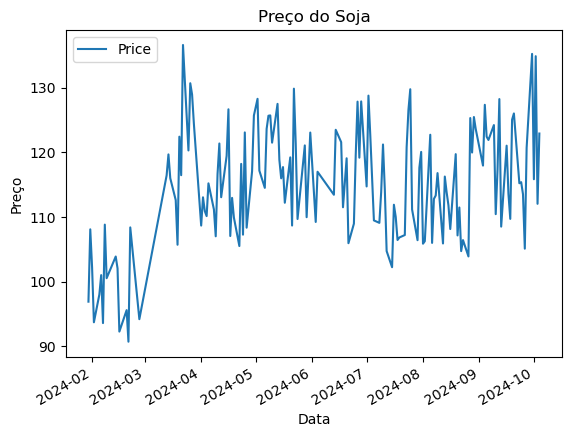

In [39]:
milho = mercado[mercado['Product'] == 'Milho']
soja = mercado[
    (mercado['Product'] == 'Soja') &
    (mercado['Origin_state'] == 'MG') &
    (mercado['Origin_city'] == 'Araguari') &
    (mercado['Destination_state'] == 'SP') &
    (mercado['Destination_city'] == 'Santos') &
    (mercado['Company'] == 'Polaris')
]
soja = soja.sort_values(by='Date', ascending=True)
soja.plot(x='Date', y='Price', kind='line', title='Preço do Soja', xlabel='Data', ylabel='Preço')

Outliers - Price e CBOT

<Axes: >

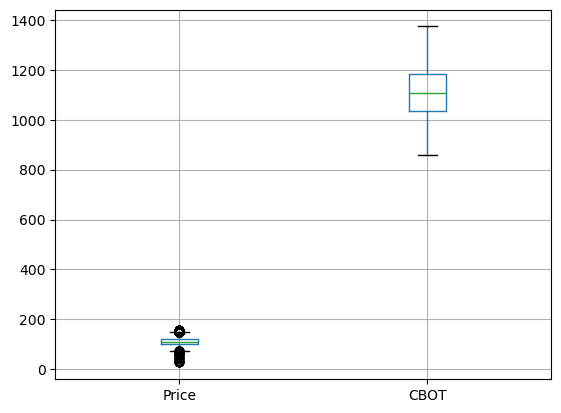

In [40]:
mercado_filtrado.boxplot(column=['Price','CBOT'])

CBOT não possui outliers, porém o Price sim!

<Axes: >

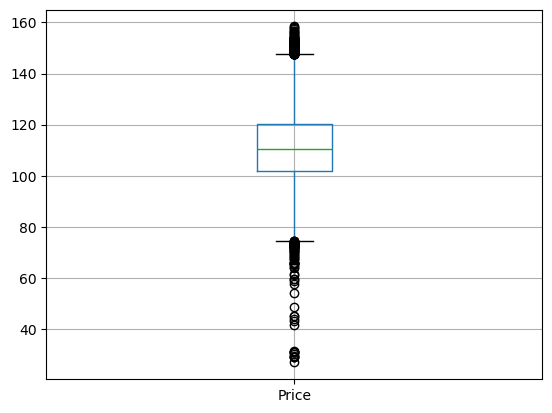

In [41]:
mercado_filtrado.boxplot(column='Price')

Calculando os whiskers - Função de Whiskers

In [42]:
def whiskers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    minw = q1 - 1.5 * iqr
    maxw = q3 + 1.5 * iqr
    return minw, maxw

In [43]:
lw, uw = whiskers(mercado_filtrado,'Price')
lw, uw

(74.43730112473786, 147.50738083689834)

Substituindo os outliers pelos whiskers

In [44]:
#Valores menores que lw
mercado_filtrado.loc[mercado_filtrado['Price']<lw,'Price'] = lw
#valores maiores que uw
mercado_filtrado.loc[mercado_filtrado['Price']>uw,'Price'] = uw

Verificando se sumiu os outliers

<Axes: >

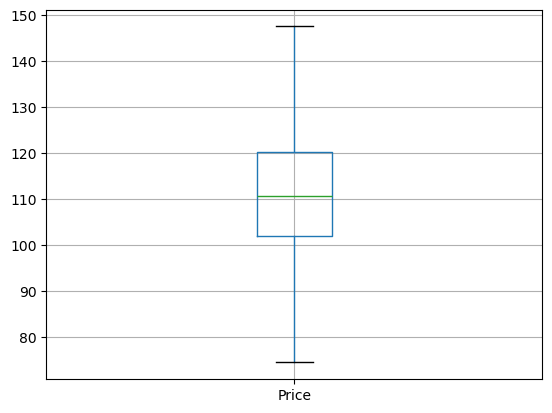

In [45]:
mercado_filtrado.boxplot(column='Price')

<Axes: >

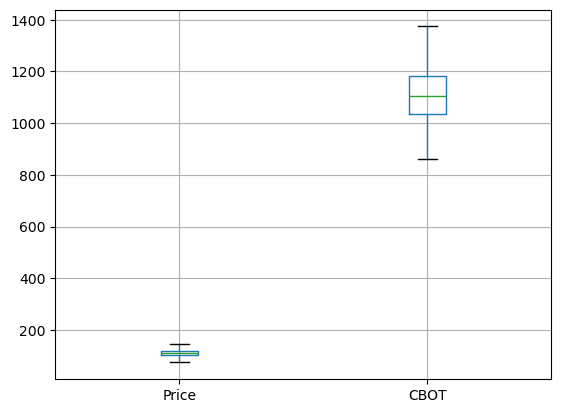

In [46]:
mercado_filtrado.boxplot(column=['Price','CBOT'])

## Medias diárias
- Price
- CBOT

In [47]:
mercado_filtrado[mercado_filtrado['Date']=='2024-01-31']['Price'].mean()

98.58560440136775

In [48]:
mercado_filtrado = mercado_filtrado.groupby('Date')[['Price', 'CBOT']].mean().reset_index()
mercado_filtrado

,Date,Price,CBOT
0,2024-01-30,97.111044,1215.886963
1,2024-01-31,98.585604,1222.299024
2,2024-02-01,96.726709,1209.233105
3,2024-02-02,97.929889,1199.996115
4,2024-02-05,98.724389,1198.463847
...,...,...,...
195,2024-10-30,117.017311,1008.964607
196,2024-10-31,117.366682,1018.034067
197,2024-11-01,117.601042,1012.899216
198,2024-11-04,115.506245,1020.956401


# Fazendo cotação do Dolár

Recebendo a data minima e maxima

In [49]:
data_max = mercado_filtrado.max()['Date']
data_max = str(data_max).replace(' 00:00:00','')
data_min = mercado_filtrado.min()['Date']
data_min = str(data_min).replace(' 00:00:00','')
data_min, data_max

('2024-01-30', '2024-11-05')

In [50]:
import yfinance as yf

dolar = yf.Ticker('USDBRL=X')
dolar_hist = dolar.history(interval='1d', start=data_min, end='2024-11-06')
dolar_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-30 00:00:00+00:00,4.950200,4.9773,4.933200,4.950200,0,0.0,0.0
2024-01-31 00:00:00+00:00,4.950300,4.9621,4.927000,4.950300,0,0.0,0.0
2024-02-01 00:00:00+00:00,4.951900,4.9664,4.912300,4.951900,0,0.0,0.0
2024-02-02 00:00:00+00:00,4.915000,4.9736,4.900782,4.915000,0,0.0,0.0
2024-02-05 00:00:00+00:00,4.932938,5.0147,4.932938,4.932938,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-30 00:00:00+00:00,5.760000,5.7885,5.672741,5.760000,0,0.0,0.0
2024-10-31 00:00:00+00:00,5.762300,5.7902,5.753358,5.762300,0,0.0,0.0
2024-11-01 00:00:00+00:00,5.789400,5.8318,5.760531,5.789400,0,0.0,0.0


## Manipulando o dolár

In [51]:
dolar_hist = dolar_hist.reset_index()
dolar_hist = dolar_hist[['Date','Close']]
dolar_hist

,Date,Close
0,2024-01-30 00:00:00+00:00,4.950200
1,2024-01-31 00:00:00+00:00,4.950300
2,2024-02-01 00:00:00+00:00,4.951900
3,2024-02-02 00:00:00+00:00,4.915000
4,2024-02-05 00:00:00+00:00,4.932938
...,...,...
196,2024-10-30 00:00:00+00:00,5.760000
197,2024-10-31 00:00:00+00:00,5.762300
198,2024-11-01 00:00:00+00:00,5.789400
199,2024-11-04 00:00:00+00:00,5.677526


In [52]:
dolar_hist['Date'] = dolar_hist['Date'].dt.tz_convert(None)
dolar_hist['Date'] = dolar_hist['Date'].dt.normalize()
dolar_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    201 non-null    datetime64[ns]
 1   Close   201 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [53]:
dolar_hist

,Date,Close
0,2024-01-30,4.950200
1,2024-01-31,4.950300
2,2024-02-01,4.951900
3,2024-02-02,4.915000
4,2024-02-05,4.932938
...,...,...
196,2024-10-30,5.760000
197,2024-10-31,5.762300
198,2024-11-01,5.789400
199,2024-11-04,5.677526


Identificando se subiu ou não
- 0 ou False = Não Subiu
- 1 ou True = Subiu

In [54]:
dolar_hist['Variação'] = dolar_hist['Close'].shift(1) < dolar_hist['Close']
dolar_hist

,Date,Close,Variação
0,2024-01-30,4.950200,False
1,2024-01-31,4.950300,True
2,2024-02-01,4.951900,True
3,2024-02-02,4.915000,False
4,2024-02-05,4.932938,True
...,...,...,...
196,2024-10-30,5.760000,True
197,2024-10-31,5.762300,True
198,2024-11-01,5.789400,True
199,2024-11-04,5.677526,False


In [55]:
dolar_hist['Variação Percentual'] = ((dolar_hist['Close'] - dolar_hist['Close'].shift(1)) / dolar_hist['Close']) * 100
dolar_hist = dolar_hist.fillna(0)
dolar_hist

,Date,Close,Variação,Variação Percentual
0,2024-01-30,4.950200,False,0.000000
1,2024-01-31,4.950300,True,0.002023
2,2024-02-01,4.951900,True,0.032307
3,2024-02-02,4.915000,False,-0.750764
4,2024-02-05,4.932938,True,0.363640
...,...,...,...,...
196,2024-10-30,5.760000,True,0.864590
197,2024-10-31,5.762300,True,0.039911
198,2024-11-01,5.789400,True,0.468098
199,2024-11-04,5.677526,False,-1.970473


# Mercado X Dolár

In [56]:
mercado_filtrado.shape , dolar_hist.shape

((200, 3), (201, 4))

In [57]:
mercado_dolar = pd.merge(mercado_filtrado,dolar_hist,on='Date',how='outer')
mercado_dolar

,Date,Price,CBOT,Close,Variação,Variação Percentual
0,2024-01-30,97.111044,1215.886963,4.950200,False,0.000000
1,2024-01-31,98.585604,1222.299024,4.950300,True,0.002023
2,2024-02-01,96.726709,1209.233105,4.951900,True,0.032307
3,2024-02-02,97.929889,1199.996115,4.915000,False,-0.750764
4,2024-02-05,98.724389,1198.463847,4.932938,True,0.363640
...,...,...,...,...,...,...
227,2024-10-30,117.017311,1008.964607,5.760000,True,0.864590
228,2024-10-31,117.366682,1018.034067,5.762300,True,0.039911
229,2024-11-01,117.601042,1012.899216,5.789400,True,0.468098
230,2024-11-04,115.506245,1020.956401,5.677526,False,-1.970473


# Expandir time series

In [58]:
date_range = pd.date_range(start=data_min,end=data_max,freq='d')
mercado_dolar = mercado_dolar.set_index('Date').reindex(date_range).reset_index()
mercado_dolar.rename(columns={'index': 'Date'}, inplace=True)
mercado_dolar

,Date,Price,CBOT,Close,Variação,Variação Percentual
0,2024-01-30,97.111044,1215.886963,4.950200,False,0.000000
1,2024-01-31,98.585604,1222.299024,4.950300,True,0.002023
2,2024-02-01,96.726709,1209.233105,4.951900,True,0.032307
3,2024-02-02,97.929889,1199.996115,4.915000,False,-0.750764
4,2024-02-03,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
276,2024-11-01,117.601042,1012.899216,5.789400,True,0.468098
277,2024-11-02,NaN,NaN,NaN,NaN,NaN
278,2024-11-03,NaN,NaN,NaN,NaN,NaN
279,2024-11-04,115.506245,1020.956401,5.677526,False,-1.970473


Preenchendo os valores faltantes de final de semana ou feriado com Forward Fill
- Ex: Repetir o valor de sexta para sabado e domingo

In [59]:
mercado_df = mercado_dolar
mercado_df.ffill(inplace=True)
mercado_df

C:\Users\Miguel Mendes\AppData\Local\Temp\ipykernel_13208\1533611770.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mercado_df.ffill(inplace=True)


,Date,Price,CBOT,Close,Variação,Variação Percentual
0,2024-01-30,97.111044,1215.886963,4.950200,False,0.000000
1,2024-01-31,98.585604,1222.299024,4.950300,True,0.002023
2,2024-02-01,96.726709,1209.233105,4.951900,True,0.032307
3,2024-02-02,97.929889,1199.996115,4.915000,False,-0.750764
4,2024-02-03,97.929889,1199.996115,4.915000,False,-0.750764
...,...,...,...,...,...,...
276,2024-11-01,117.601042,1012.899216,5.789400,True,0.468098
277,2024-11-02,117.601042,1012.899216,5.789400,True,0.468098
278,2024-11-03,117.601042,1012.899216,5.789400,True,0.468098
279,2024-11-04,115.506245,1020.956401,5.677526,False,-1.970473


# Salvando o dataset tratado em excel

In [60]:
mercado_df.to_excel("C:/workspace/Desafio Grão Direto IA/Data/mercado-desafio-tratado.xlsx", index=False)